In [1]:
from databases import Database
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
db = Database("sqlite:///./app/test.db")

In [4]:
query = """
            SELECT *
            FROM predictions
        """

In [5]:
rows = await db.fetch_all(query=query)

In [6]:
rows

[(2, 'testttt', '2021-04-29 00:00:00', 'Male', '0.0', 'No', 'No', '0.0', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', '45.0', '160', '0'),
 (3, 'testttt', '2021-04-17 21:00:00', 'Male', '0.0', 'No', 'No', '0.0', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', '0.0', '0.0', '1'),
 (4, 'testttt', '2023-04-24 00:00:00', 'Male', '0.0', 'No', 'No', '0.0', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', '12', '15.0', '0'),
 (5, 'testttt', '2023-04-20 00:00:00', 'Male', '0.0', 'No', 'No', '5', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', '5', '25', '1'),
 (6, 'testttt', '2023-04-27 00:00:00', 'Male', '0.0', 'No', 'No', '0.0', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Month-to-month', 'No', 'Credit card (automatic)', '22.0', '50', '0'),
 (7, 

In [12]:
# Load the data into a Pandas dataframe
df = pd.read_sql_query("SELECT * FROM predictions", "sqlite:///./app/test.db")

# Convert the requested_time column to a datetime data type
df['requested_time'] = pd.to_datetime(df['requested_time'], format='ISO8601')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


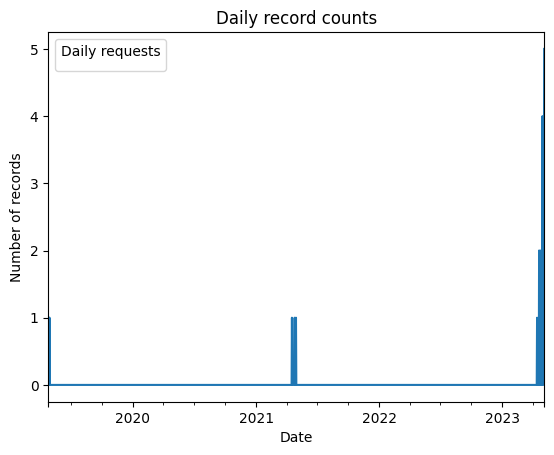

In [18]:
# Group the data by day
daily_counts = df.groupby(pd.Grouper(key='requested_time', freq='D')).size()

# Create a line plot of the daily counts
daily_counts.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of records')
plt.title('Daily record counts')
plt.legend(title='Daily requests', loc='upper left')
plt.show()

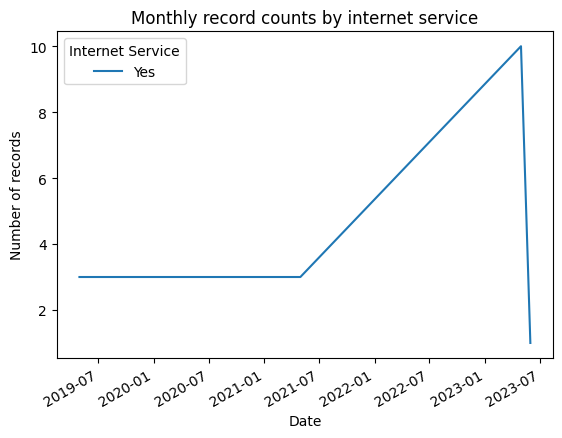

In [14]:
# Filter the data to include only records with internet service
internet_df = df[df['InternetService'] != 'No']

# Group the data by day and internet service
daily_counts = internet_df.groupby([pd.Grouper(key='requested_time', freq='M'), 'InternetService']).size()

# Plot the daily counts
daily_counts.unstack().plot(kind='line')

plt.xlabel('Date')
plt.ylabel('Number of records')
plt.title('Monthly record counts by internet service')
plt.legend(title='Internet Service', loc='upper left')
plt.show()

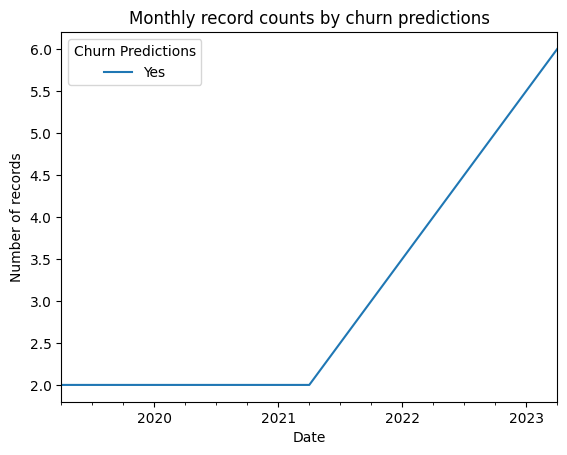

In [16]:
# Filter the data to include only records with internet service
internet_df = df[df['predictions'] == '1']

# Group the data by day and internet service
daily_counts = internet_df.groupby([pd.Grouper(key='requested_time', freq='M'), 'InternetService']).size()

# Plot the daily counts
daily_counts.unstack().plot(kind='line')

plt.xlabel('Date')
plt.ylabel('Number of records')
plt.title('Monthly record counts by churn predictions')
plt.legend(title='Churn Predictions', loc='upper left')
plt.show()

### TODO Implement Kolmogorov-Smirnov test

The Kolmogorov-Smirnov test is a statistical test used to compare two samples and determine if they come from the same probability distribution. It measures the maximum difference between the cumulative distribution functions of the two samples.

In [21]:
# from scipy.stats import ks_2samp
# import pandas as pd

# # Load the old and new datasets
# old_data = pd.read_csv('old_data.csv')
# new_data = pd.read_csv('new_data.csv')

# # Define the columns to test for data drift
# columns = ['column1', 'column2', 'column3']

# # Loop over the columns and test for data drift
# for col in columns:
#     # Compute the KS statistic and p-value
#     ks_statistic, p_value = ks_2samp(old_data[col], new_data[col])
    
#     # Set the significance level
#     alpha = 0.05
    
#     # Compare the p-value to the significance level
#     if p_value < alpha:
#         print(f"Data drift detected in column '{col}' with p-value {p_value}")
#     else:
#         print(f"No data drift detected in column '{col}' with p-value {p_value}")

### Sending emails in case of data drift or smth else

In [28]:
from discord.ext import commands
import discord

bot = commands.Bot(command_prefix='!')

@bot.command(pass_context=True)
async def DM(ctx, user: discord.User, *, message=None):
    message = message or "This Message is sent via DM"
    await bot.send_message(user, message)

bot.run("TOKEN")

TypeError: BotBase.__init__() missing 1 required keyword-only argument: 'intents'